# information of the dataset 

1. **loc** : 
   - Type : NumÃ©rique
   - Description : Nombre de lignes de code selon McCabe.

2. **v(g)** : 
   - Type : NumÃ©rique
   - Description : ComplexitÃ© cyclomatique de McCabe.

3. **ev(g)** : 
   - Type : NumÃ©rique
   - Description : ComplexitÃ© essentielle de McCabe.

4. **iv(g)** : 
   - Type : NumÃ©rique
   - Description : ComplexitÃ© de conception de McCabe.

5. **n** : 
   - Type : NumÃ©rique
   - Description : Total des opÃ©rateurs et opÃ©randes selon Halstead.

6. **v** : 
   - Type : NumÃ©rique
   - Description : Volume selon Halstead.

7. **l** : 
   - Type : NumÃ©rique
   - Description : Longueur du programme selon Halstead.

8. **d** : 
   - Type : NumÃ©rique
   - Description : DifficultÃ© selon Halstead.

9. **i** : 
   - Type : NumÃ©rique
   - Description : Intelligence selon Halstead.

10. **e** : 
    - Type : NumÃ©rique
    - Description : Effort selon Halstead.

11. **b** : 
    - Type : NumÃ©rique
    - Description : (Attribut de Halstead non spÃ©cifiÃ©).

12. **t** : 
    - Type : NumÃ©rique
    - Description : Estimation du temps selon Halstead.

13. **lOCode** : 
    - Type : NumÃ©rique
    - Description : Nombre de lignes de code selon Halstead.

14. **lOComment** : 
    - Type : NumÃ©rique
    - Description : Nombre de lignes de commentaires selon Halstead.

15. **lOBlank** : 
    - Type : NumÃ©rique
    - Description : Nombre de lignes vides selon Halstead.

16. **lOCodeAndComment** : 
    - Type : NumÃ©rique
    - Description : Nombre de lignes contenant du code et des commentaires.

17. **uniq_Op** : 
    - Type : NumÃ©rique
    - Description : Nombre d'opÃ©rateurs uniques.

18. **uniq_Opnd** : 
    - Type : NumÃ©rique
    - Description : Nombre d'opÃ©randes uniques.

19. **total_Op** : 
    - Type : NumÃ©rique
    - Description : Total des opÃ©rateurs.

20. **total_Opnd** : 
    - Type : NumÃ©rique
    - Description : Total des opÃ©randes.

21. **branchCount** : 
    - Type : NumÃ©rique
    - Description : Nombre de branches du graphique de flux.

22. **defects** : 
    - Type : BoolÃ©en {false, true}
    - Description : Indique si un module a ou non un ou plusieurs dÃ©fauts signalÃ©s.


In [1]:
import pandas as pd 
import numpy as np

In [ ]:

import os
import gdown
import pandas as pd

# Create the directory for storing files
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

# Google Drive file IDs (replace with actual IDs)
TRAIN_FILE_ID = "12YHRrcBP4PBWMMq_EQuPQqnBUKQ9Jgks"
TEST_FILE_ID = "1CW2N4NbiKqc8hykUxf5pfQVXsKUHW81a"


# File paths
train_output = os.path.join(DATA_DIR, "train.csv")
test_output = os.path.join(DATA_DIR, "test.csv")

# Download train.csv
print("ðŸ“¥ Downloading train.csv...")
gdown.download(f"https://drive.google.com/uc?id={TRAIN_FILE_ID}", train_output, quiet=False)

# Download test.csv
print("ðŸ“¥ Downloading test.csv...")
gdown.download(f"https://drive.google.com/uc?id={TEST_FILE_ID}", test_output, quiet=False)

# Load into Pandas DataFrame
print("ðŸ“Š Loading data into DataFrames...")
df_train = pd.read_csv(train_output,index_col="id")
df_test = pd.read_csv(test_output,index_col="id")

# Confirm shapes
print("\nâœ… Files downloaded successfully!")
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

ðŸ“¥ Downloading train.csv...


SSLError: HTTPSConnectionPool(host='drive.google.com', port=443): Max retries exceeded with url: /uc?id=1L5-1-vG47U8usj5fqLQ_ZP7WBSTTKWqC (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1017)')))

In [ ]:
train = df_train.copy()
test = df_test.copy()

In [3]:
train.shape,test.shape,train.columns,test.columns

((101763, 23),
 (67842, 22),
 Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
        'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
        'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
        'defects'],
       dtype='object'),
 Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
        'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
        'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
       dtype='object'))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


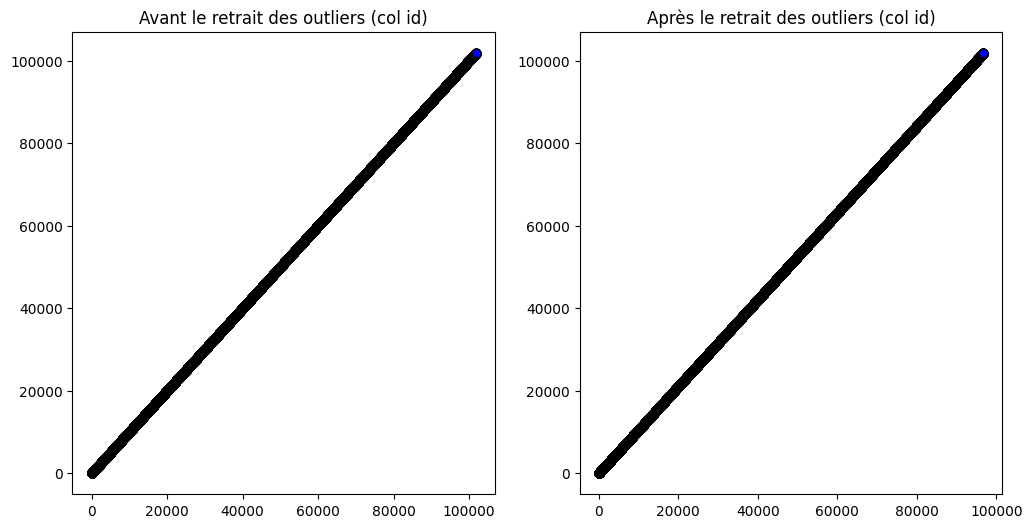

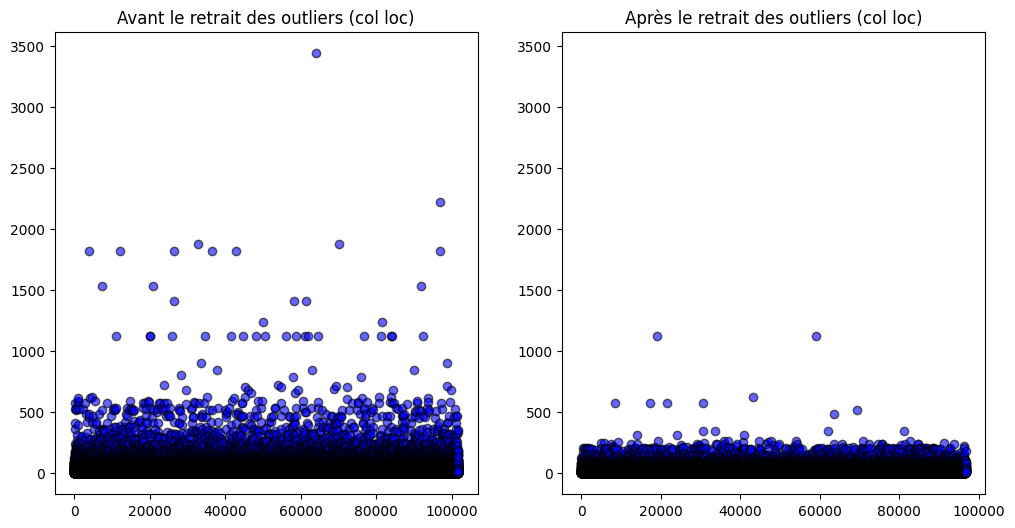

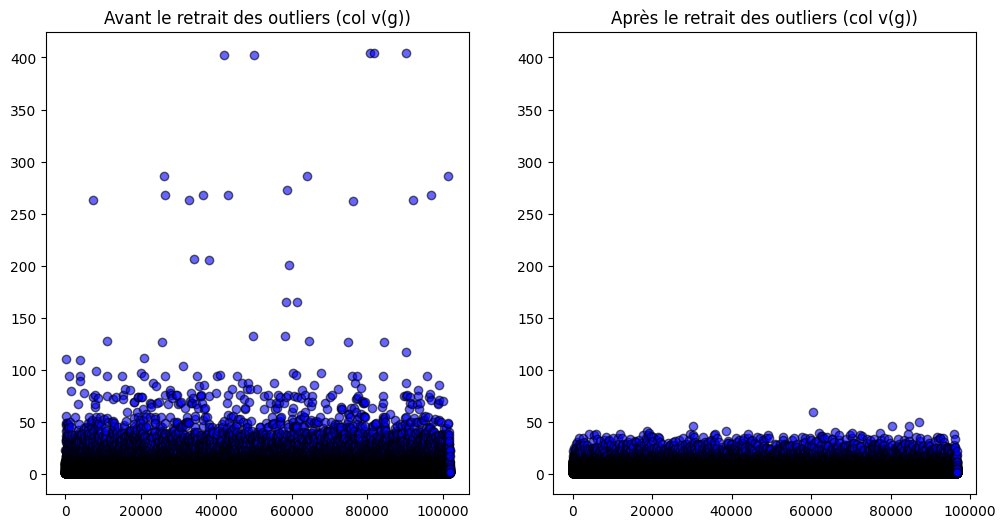

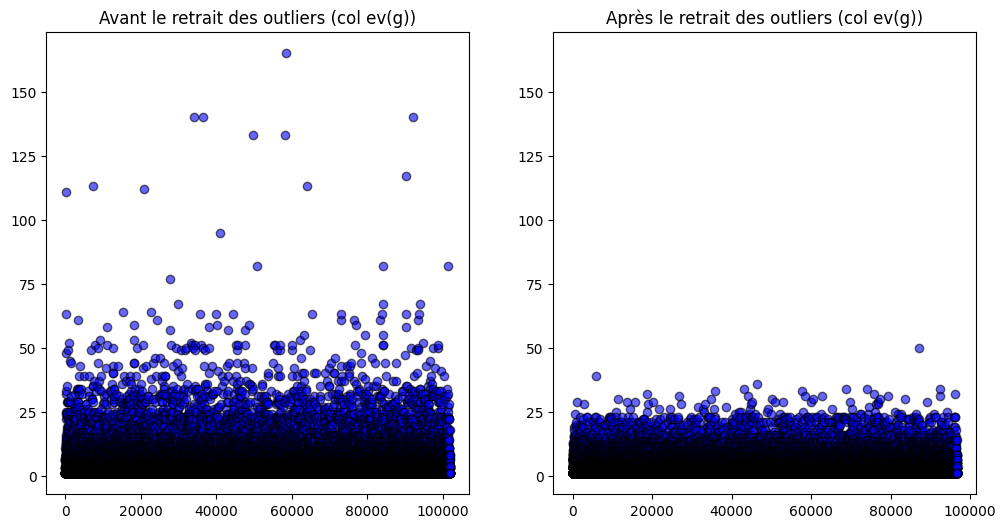

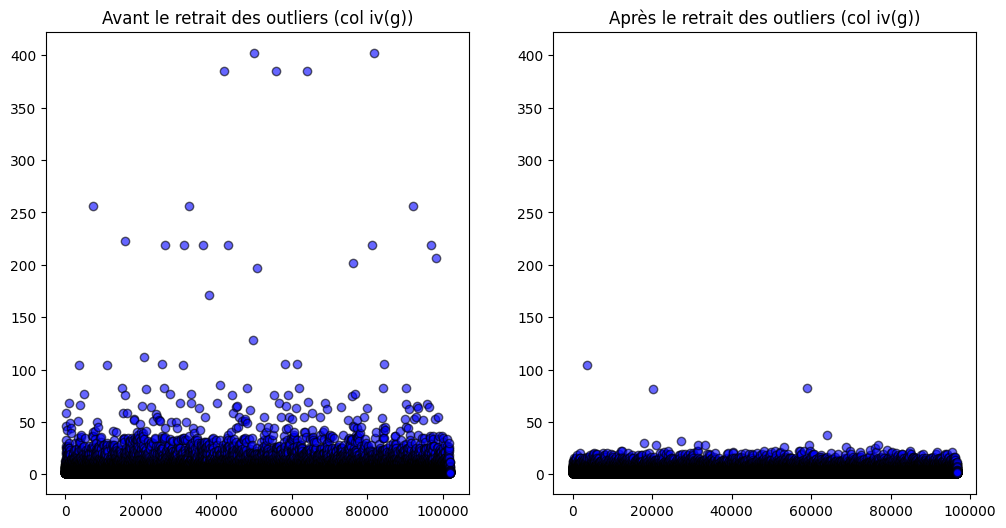

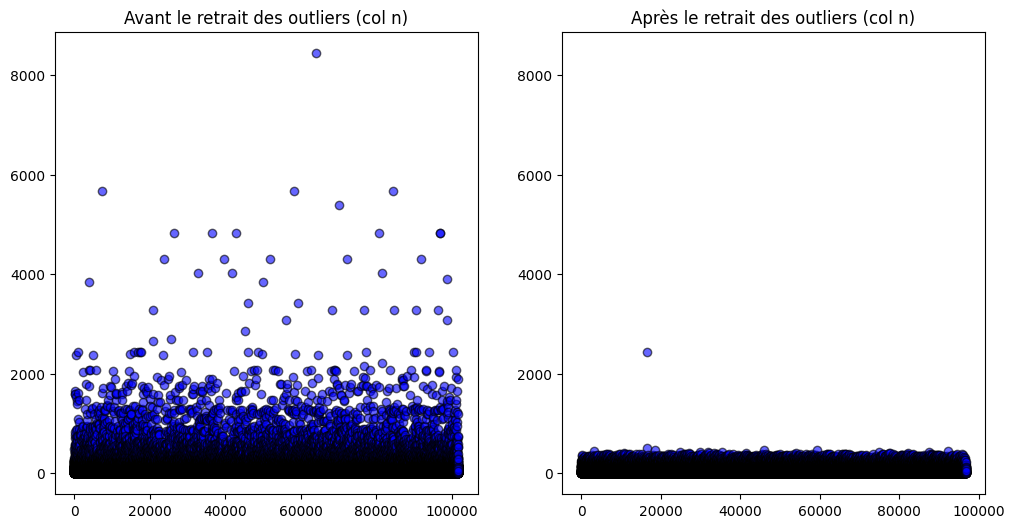

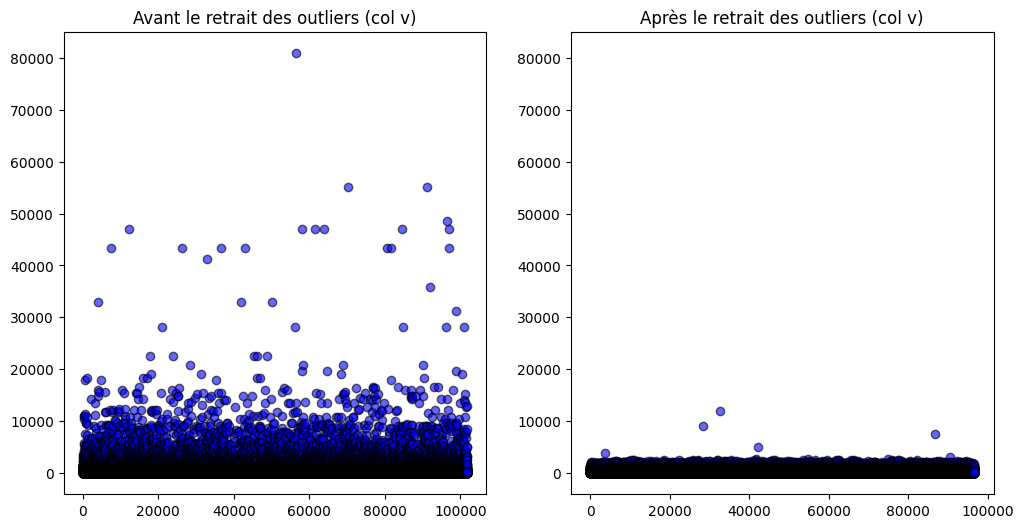

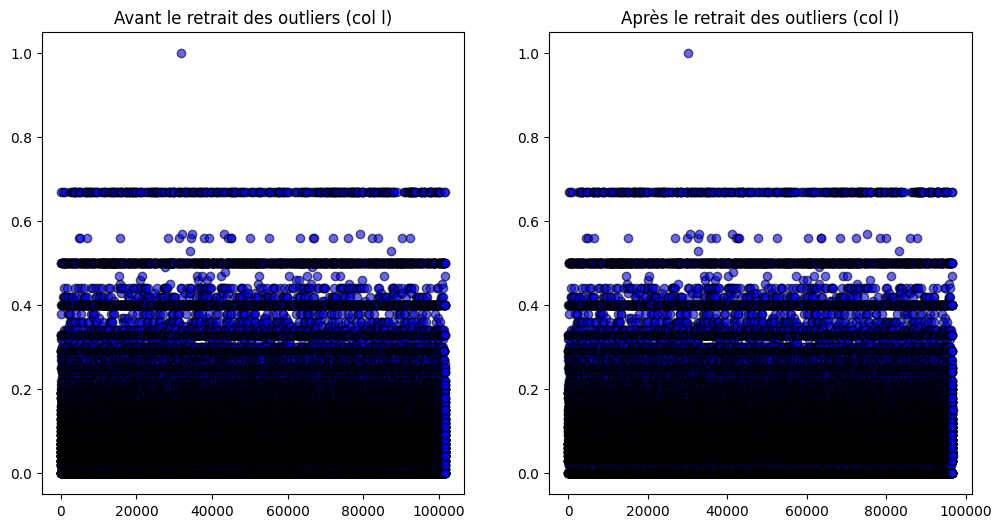

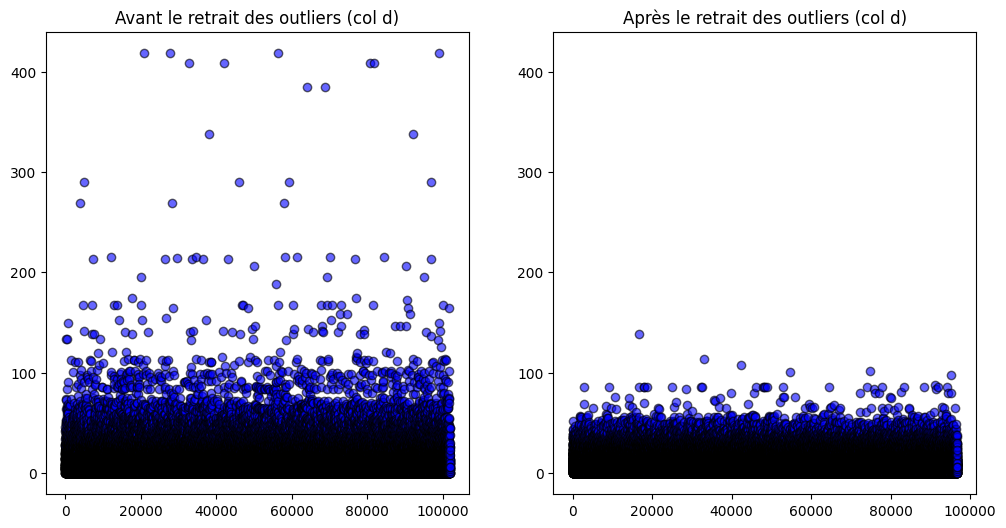

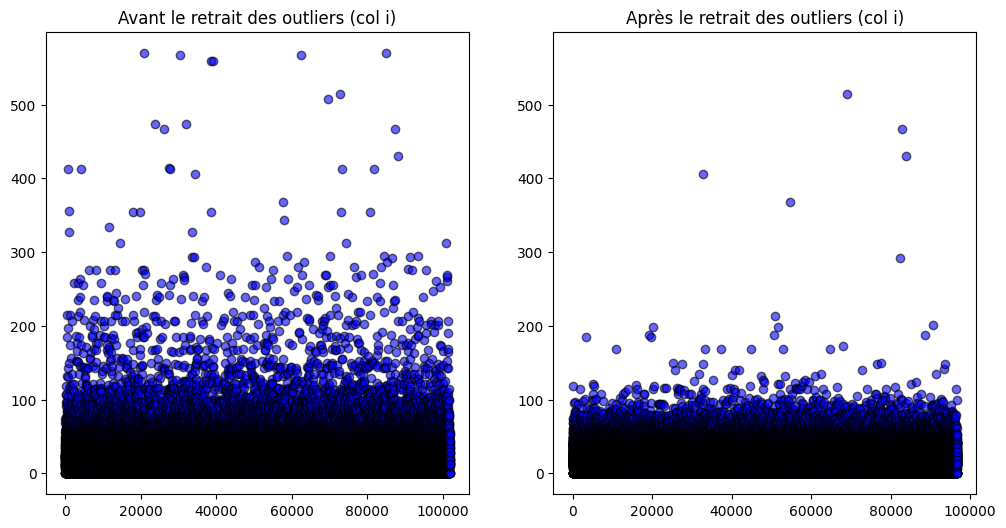

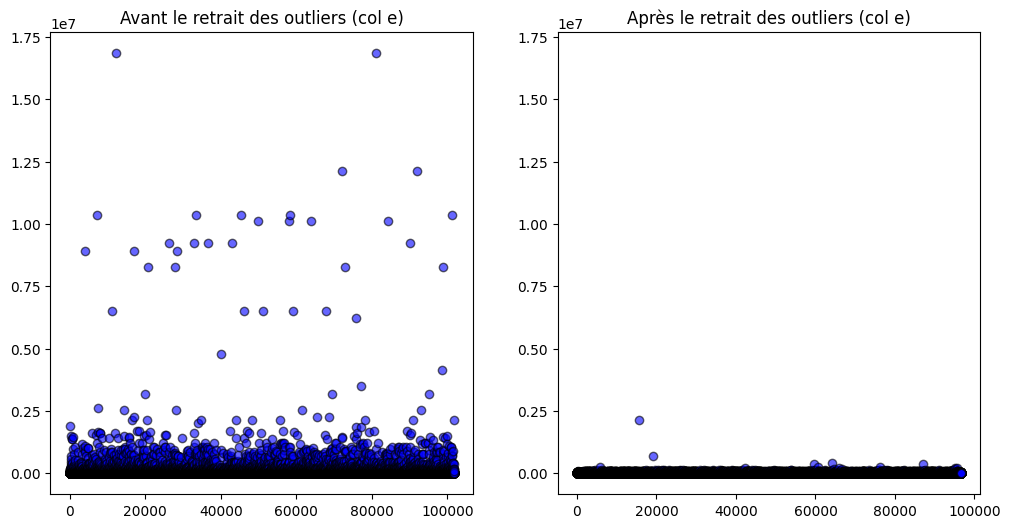

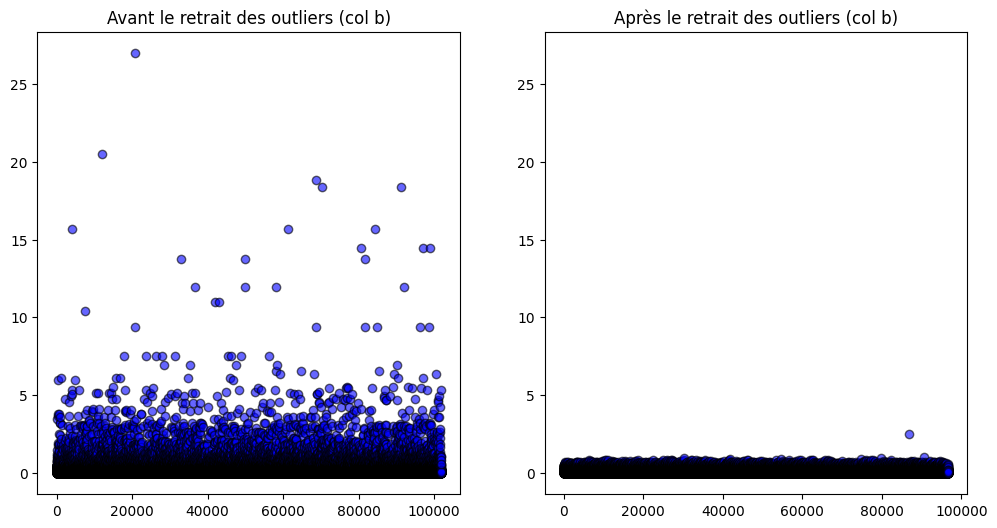

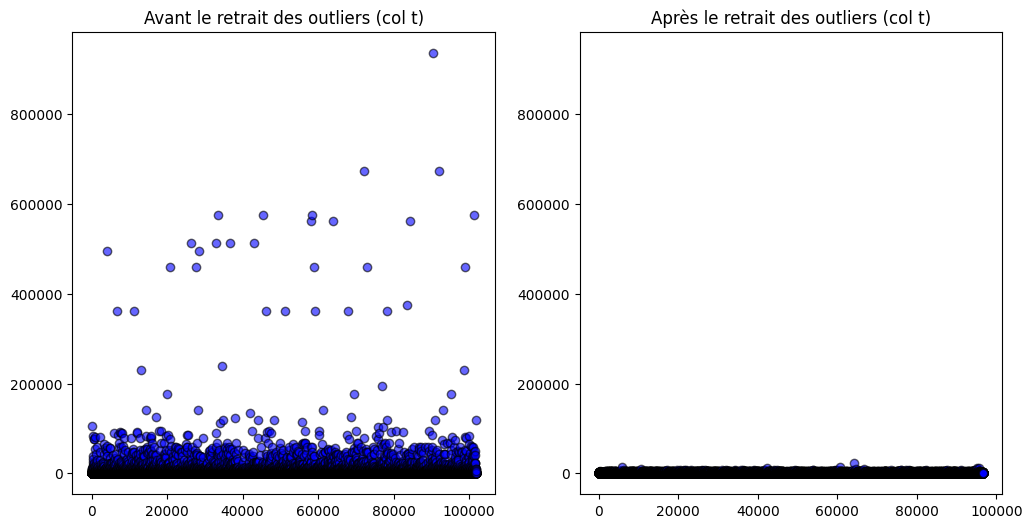

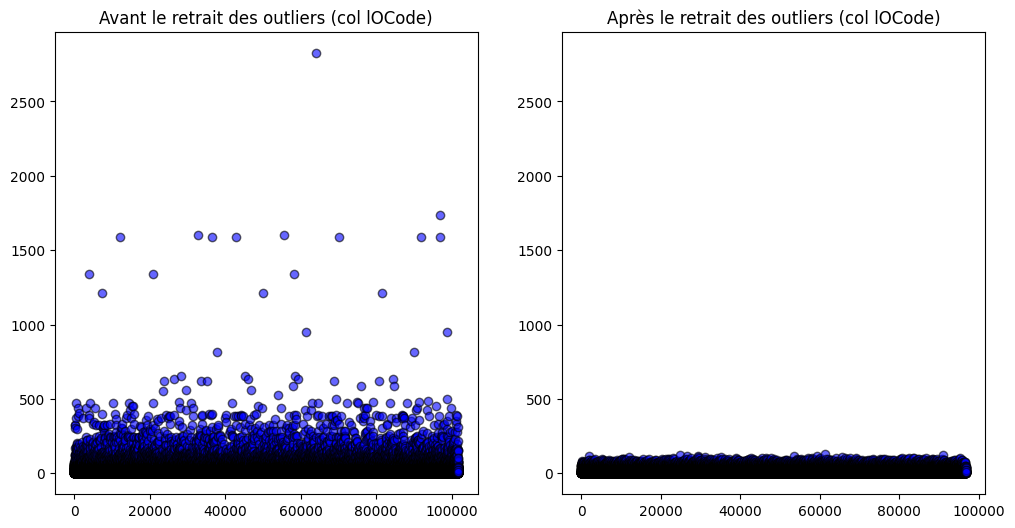

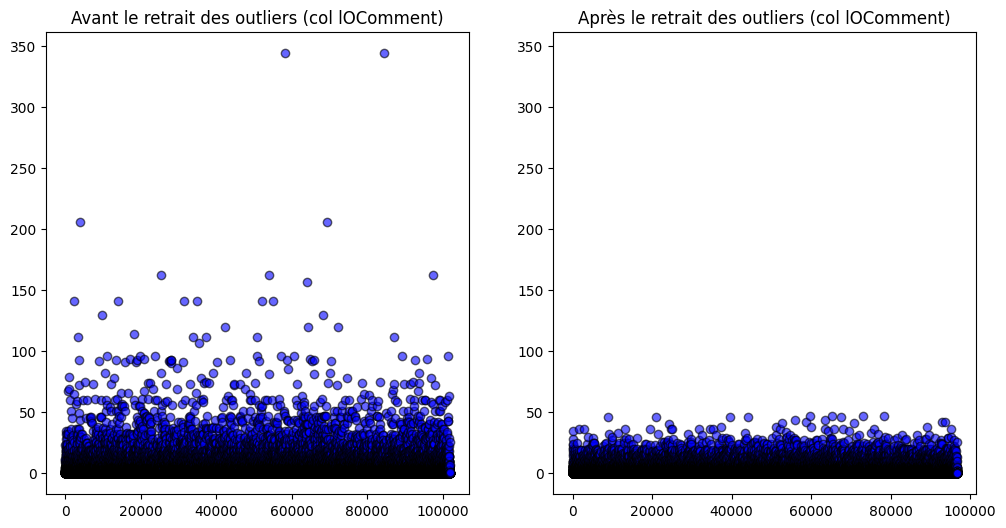

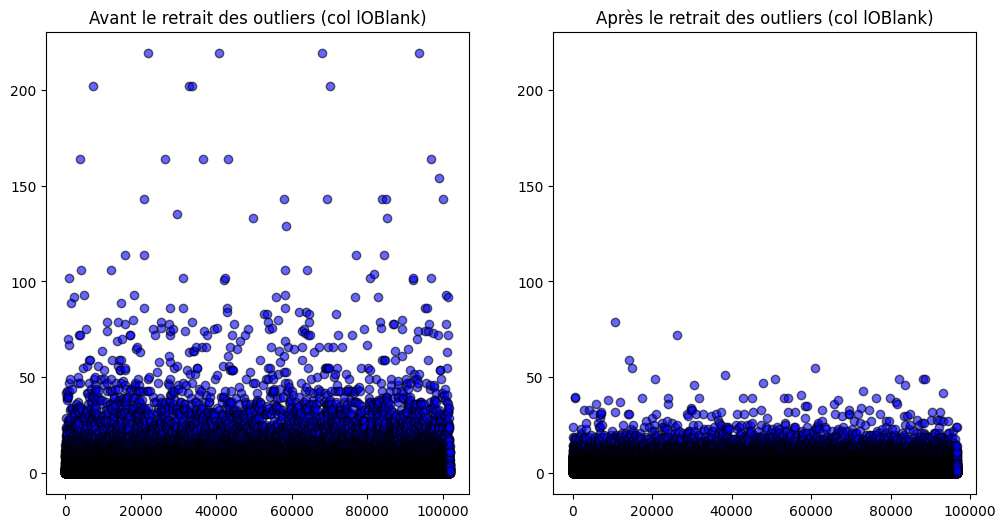

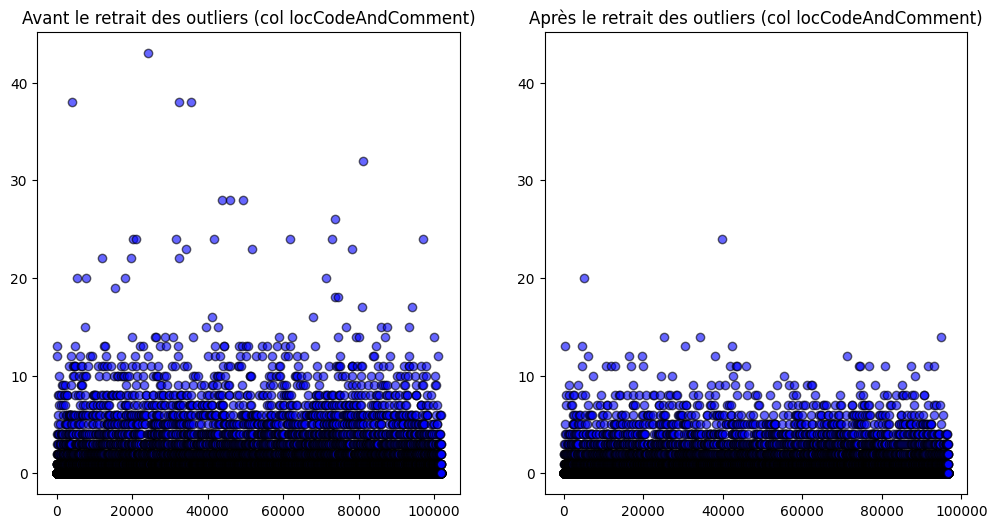

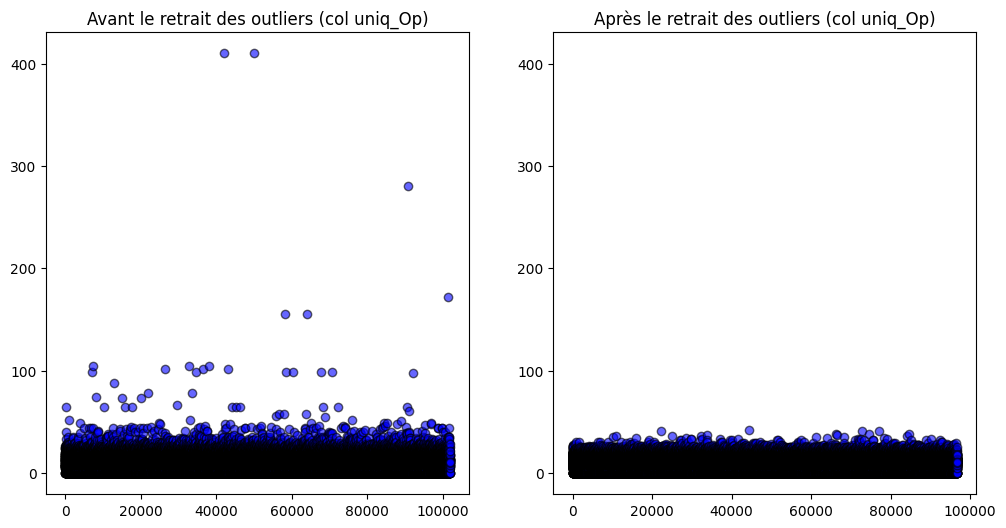

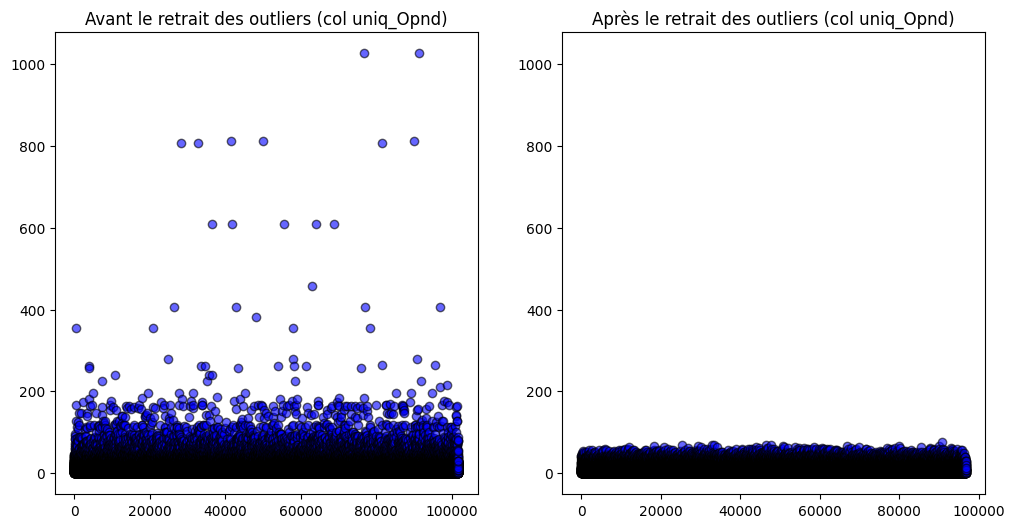

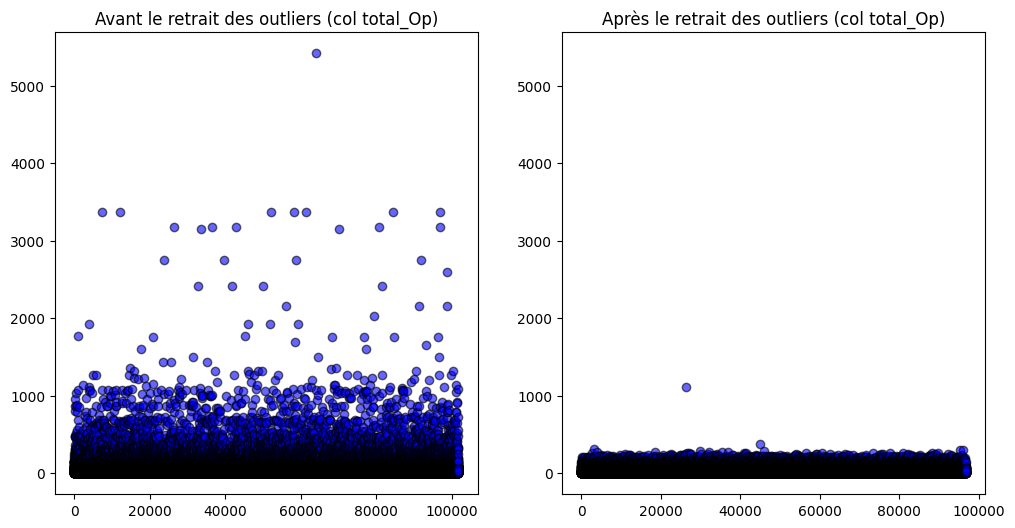

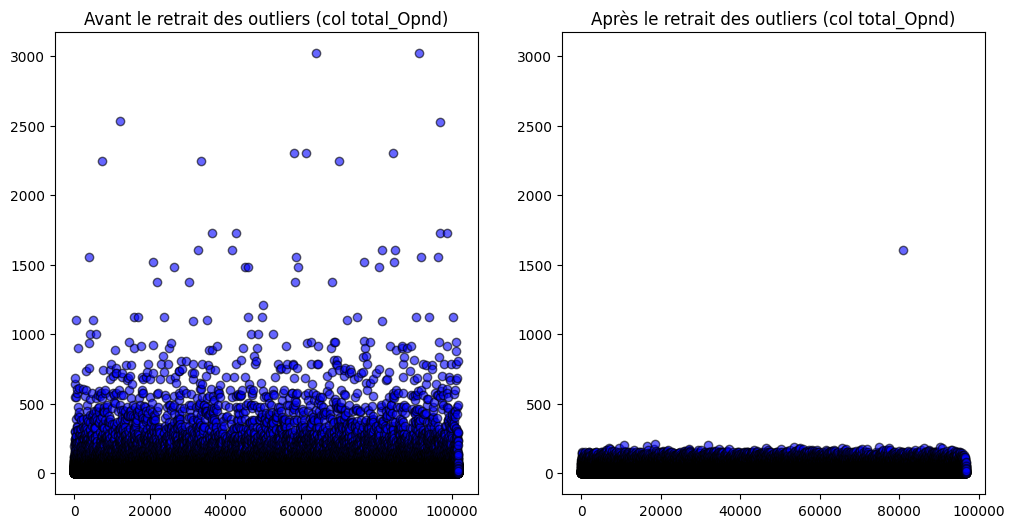

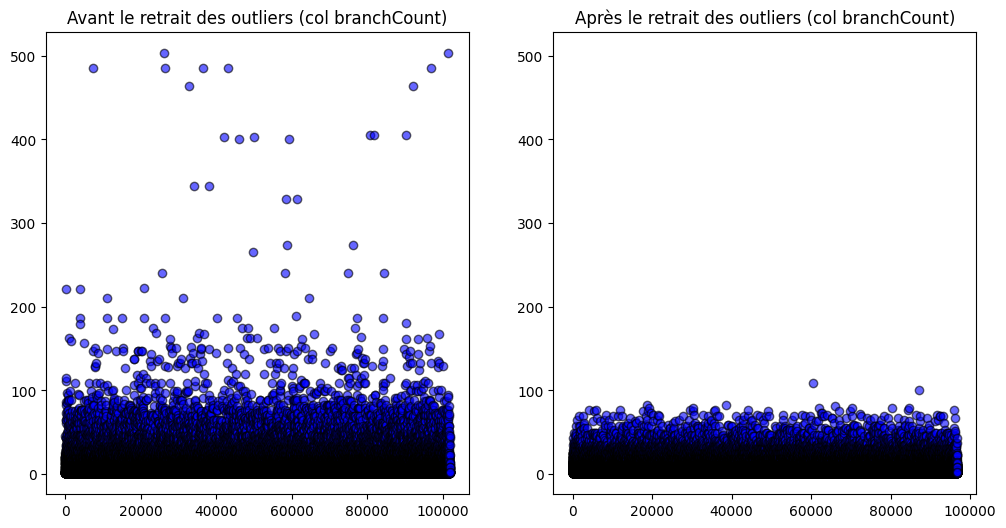

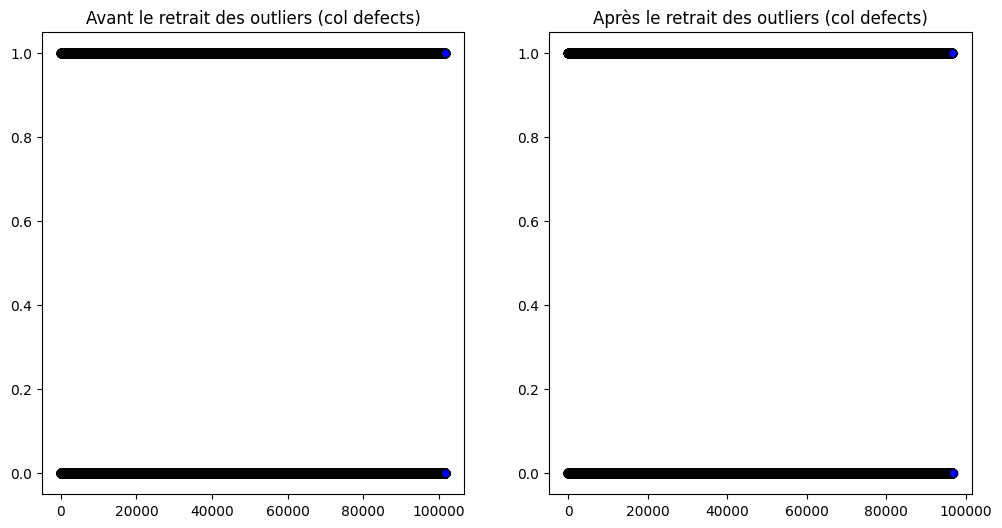

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd


X = train

clf = IsolationForest(contamination=0.05)
clf.fit(X)
outliers = clf.predict(X) == -1

clean_data = X[~outliers]

def plot_before_after(original_data, cleaned_data, column_index):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    
    x_axis = range(len(original_data))
    x_axis_clean = range(len(cleaned_data))


    column_name = original_data.columns[column_index]

   
    axs[0].scatter(x_axis, original_data.iloc[:, column_index], color='b', alpha=0.6, edgecolors='k')
    axs[0].set_title(f'Avant le retrait des outliers (col {column_name})')

    
    axs[1].scatter(x_axis_clean, cleaned_data.iloc[:, column_index], color='b', alpha=0.6, edgecolors='k')
    axs[1].set_title(f'AprÃ¨s le retrait des outliers (col {column_name})')

    
    y_limits = axs[0].get_ylim()
    axs[1].set_ylim(y_limits)

    plt.show()


for i in range(X.shape[1]):
    plot_before_after(X, clean_data, i)





In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = clean_data.drop('defects', axis=1)  
y = clean_data['defects']  
# Division des donnÃ©es en ensembles d'entraÃ®nement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CrÃ©ation du modÃ¨le
rfc = RandomForestClassifier(random_state=42)

# EntraÃ®nement du modÃ¨le
rfc.fit(X_train, y_train)

# PrÃ©diction sur l'ensemble de test
y_pred = rfc.predict_proba(test)